In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector

In [ ]:
def dist_to_center(center:tuple, coordinate:tuple):
    dist = (coordinate[0]-center[0],coordinate[1]-center[1])
    return dist

(1198, 223) (1002, 218)
(1002, 218) (993, 410)
(993, 410) (1192, 417)
(1192, 417) (1198, 223)


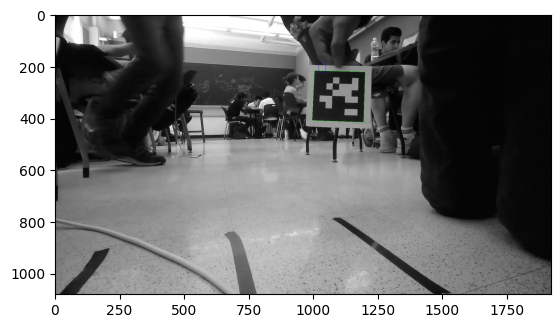

(1236, 342) (1047, 310)
(1047, 310) (1012, 504)
(1012, 504) (1200, 536)
(1200, 536) (1236, 342)


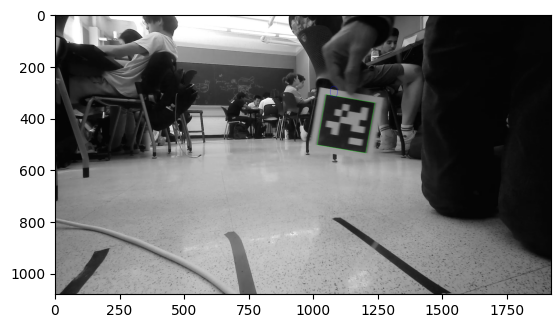

(925, 192) (784, 154)
(784, 154) (759, 293)
(759, 293) (893, 329)
(893, 329) (925, 192)


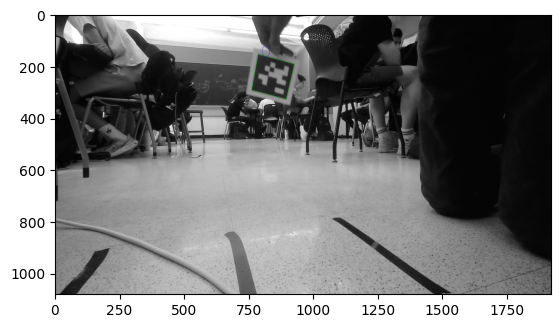

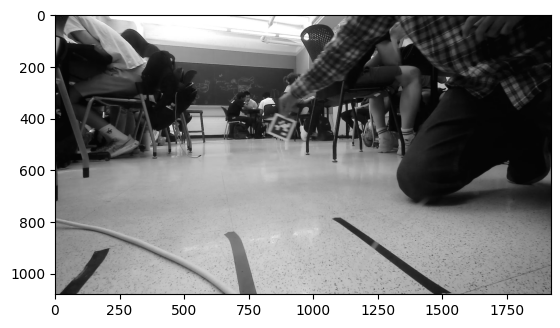

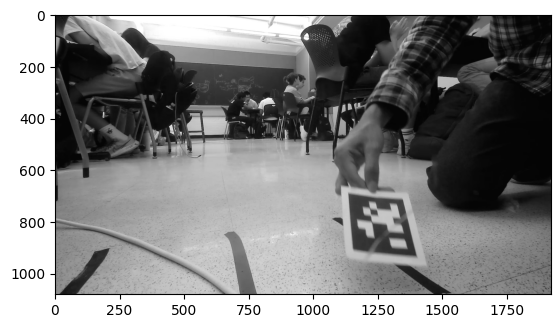

(1265, 848) (1109, 860)
(1109, 860) (1170, 942)
(1170, 942) (1354, 918)
(1354, 918) (1265, 848)


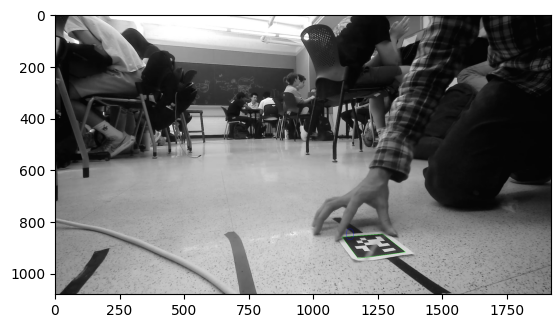

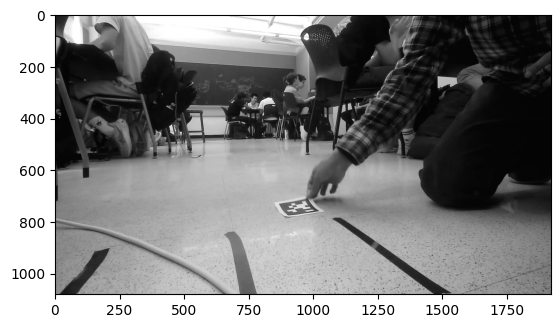

(664, 419) (481, 444)
(481, 444) (507, 642)
(507, 642) (684, 593)
(684, 593) (664, 419)


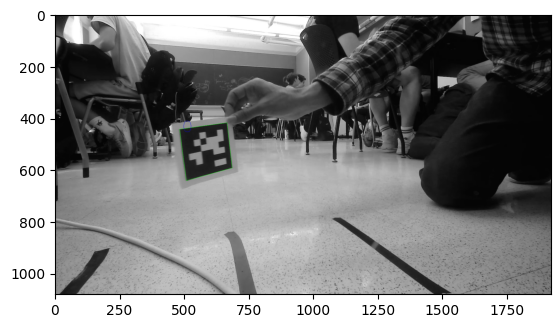

(1247, 283) (1084, 295)
(1084, 295) (1099, 461)
(1099, 461) (1263, 446)
(1263, 446) (1247, 283)


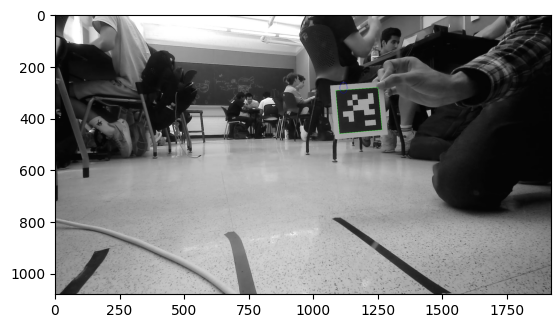

In [14]:
cap = cv2.VideoCapture('AprilTagTest.mkv')
success = cap.grab()
frames = []
slopes = []
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))
camera_params = (cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )
i=0
while success:
    if i % 100  == 0:
        _, frame = cap.retrieve()
        height, width, depth = frame.shape
        center = (width/2,height/2)
        print(center)
        cv2.line(frame, (width/2, 0), (width/2, height), (255, 0, 0), 5)
        cv2.line(frame, (0,height/2), (width, height/2), (255, 0, 0), 5)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        tags = at_detector.detect(frame, True, camera_params, 0.1)
        color_img = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
        for tag in tags:
            for idx in range(len(tag.corners)):
                cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))
                print(tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)))    
                cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=2,
                color=(0, 0, 255))
        plt.imshow(color_img)
        plt.pause(0.01)  # Pause for a short time to show the figure
        plt.clf()
    i+=1
    success = cap.grab()

# Release the video capture
cap.release()

# Close the plot window
plt.close()